In [102]:
import numpy as np
import pandas as pd

# 선형 함수 파라미터
a = 2.5
b = 1.0

# x 값 생성
np.random.seed(42)  # 재현 가능성을 위해 시드 고정
n_samples = 10
x = np.linspace(0, 10, n_samples)

# 노이즈 추가 (정규분포를 따르는 작은 잡음)
noise = np.random.normal(loc=0.0, scale=3.0, size=n_samples)

# y 값 계산: 선형 함수 + 노이즈
y = a * x + b + noise

# DataFrame 생성
df = pd.DataFrame({'x': x, 'y': y})

df

,x,y
0,0.000000,2.490142
1,1.111111,3.362985
2,2.222222,8.498621
3,3.333333,13.902423
4,4.444444,11.408651
5,5.555556,14.186478
6,6.666667,22.404305
7,7.777778,22.746749
8,8.888889,21.813799
9,10.000000,27.627680


In [103]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(df[['x']], df['y'])
y_pred = model.predict(df[['x']])

df['pred'] = y_pred
df

,x,y,pred
0,0.000000,2.490142,2.437338
1,1.111111,3.362985,5.194415
2,2.222222,8.498621,7.951492
3,3.333333,13.902423,10.708568
4,4.444444,11.408651,13.465645
5,5.555556,14.186478,16.222722
6,6.666667,22.404305,18.979798
7,7.777778,22.746749,21.736875
8,8.888889,21.813799,24.493952
9,10.000000,27.627680,27.251028


### SSE = 제곱 오차의 합, Sum of Squared Errors
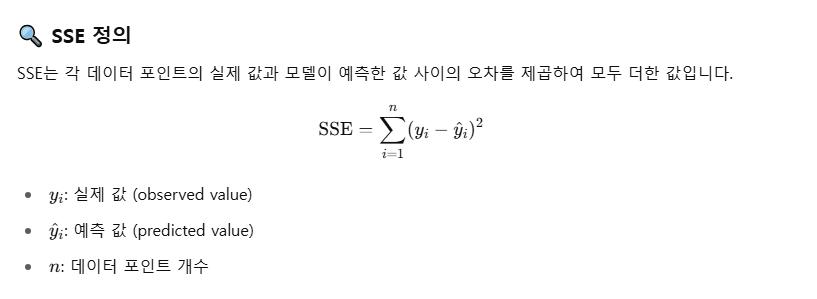

In [104]:
SSE = ((df['y'] - df['pred']) ** 2).sum()
SSE

42.30667083562263

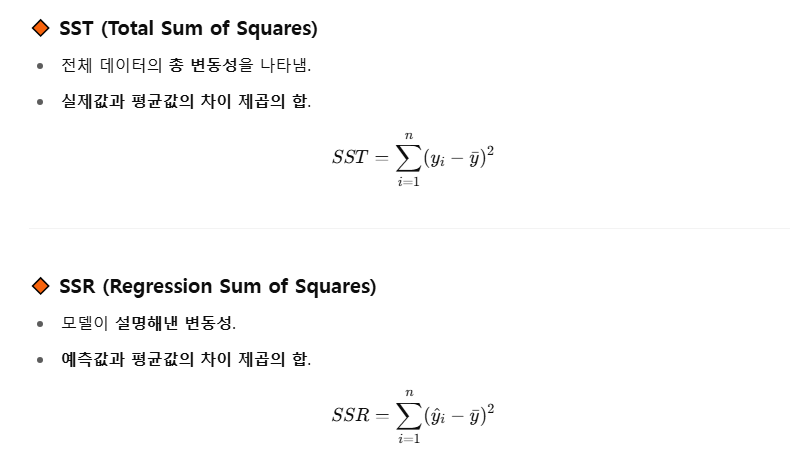

In [105]:
SST = ((df['y'] - df['y'].mean()) ** 2).sum()
SSR = ((df['pred'] - df['y'].mean()) ** 2).sum()

SST, SSR

(669.4280880779212, 627.121417242299)

In [106]:
SST, (SSR + SSE)

(669.4280880779212, 669.4280880779216)

### 상관계수 (correlation coefficient)
### 직선이 데이터에 얼마나 잘 들어맞는지 측정 (-1 ~ 1)

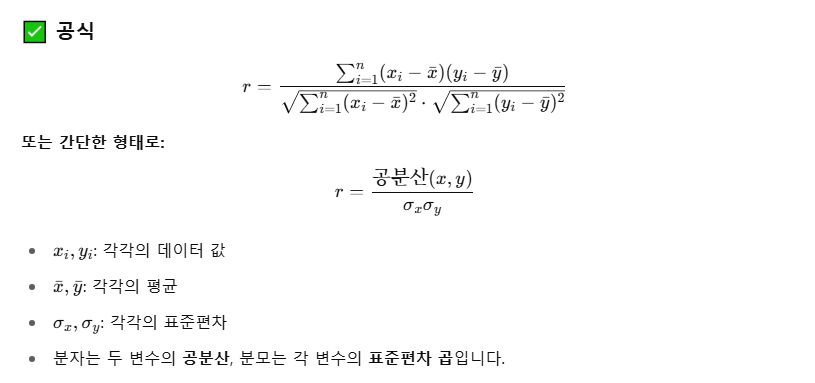

In [107]:
x = df['x']
y = df['y']
x_mean = x.mean()
y_mean = y.mean()

std_x = np.sqrt(sum((x - x_mean) ** 2))
std_y = np.sqrt(sum((y - y_mean) ** 2))

r = sum((x - x_mean) * (y - y_mean)) / (std_x * std_y)
r

0.9678852045404063

In [108]:
df.corr()

,x,y,pred
x,1.000000,0.967885,1.000000
y,0.967885,1.000000,0.967885
pred,1.000000,0.967885,1.000000


In [109]:
r = np.corrcoef(x, y)
r

array([[1.       , 0.9678852],
       [0.9678852, 1.       ]])

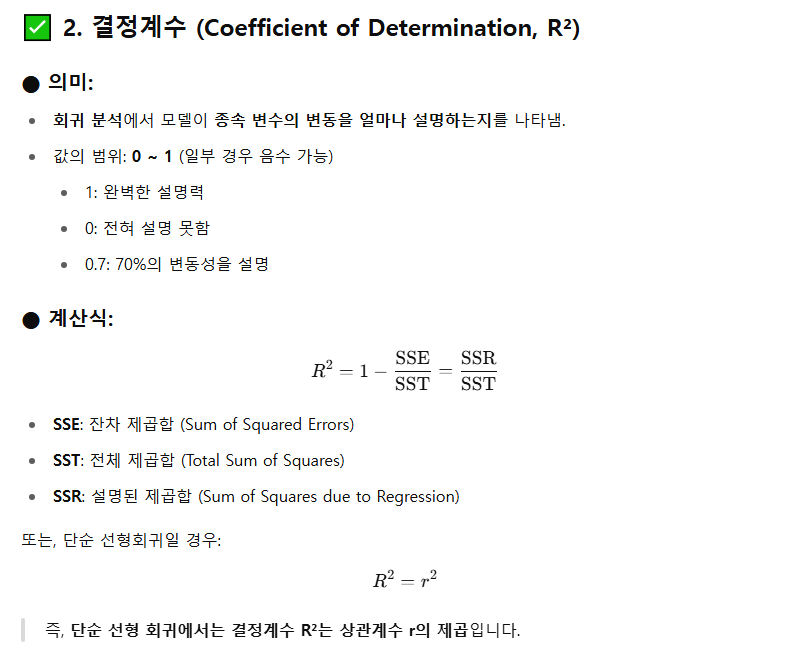

In [110]:
r2 = r ** 2
r2

array([[1.        , 0.93680177],
       [0.93680177, 1.        ]])

In [111]:
SSR / SST, 1 - (SSE / SST)

(0.9368017691682251, 0.9368017691682244)

In [112]:
from sklearn.metrics import r2_score

r2_score(df['y'], df['pred'])

0.9368017691682244

In [113]:
model.score(df[['x']], df['y'])

0.9368017691682244

### 회귀선의 기울기에 대한 신뢰구간
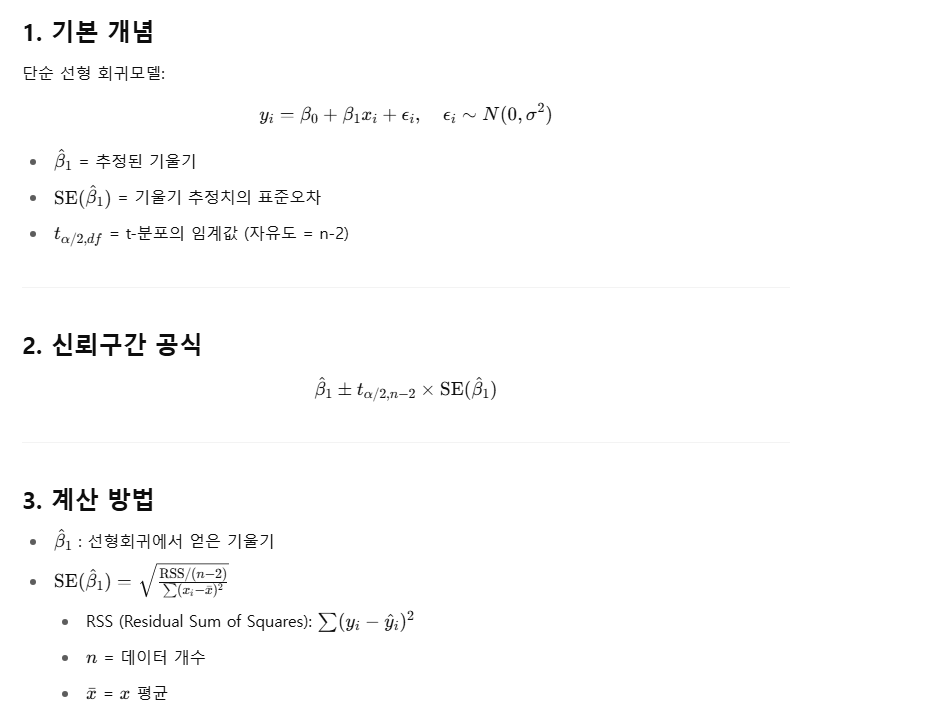

In [114]:
beta_1 = model.coef_[0]
beta_0 = model.intercept_

beta_1, beta_0

(2.481368996453521, 2.4373383528286627)

In [115]:
# 잔차
residuals = df['y'] - y_pred

n = len(y_pred)

residuals

0    0.052804
1   -1.831430
2    0.547129
3    3.193855
4   -2.056994
5   -2.036244
6    3.424507
7    1.009874
8   -2.680153
9    0.376652
Name: y, dtype: float64

In [116]:
RSS = np.sum(residuals**2)
RSS

42.30667083562263

In [117]:
Sxx = np.sum((df['x'] - df['x'].mean())**2)
Sxx

101.85185185185185

In [118]:
# 표준오차 계산
SE_beta_1 = np.sqrt((RSS / (n - 2)) / Sxx)
SE_beta_1

0.22786360678762227

In [119]:
from scipy import stats

# 신뢰구간 설정 (95%)
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, df=n-2)

lower = beta_1 - t_crit * SE_beta_1
upper = beta_1 + t_crit * SE_beta_1

print(f"기울기 추정치: {beta_1:.4f}")
print(f"95% 신뢰구간: ({lower:.4f}, {upper:.4f})")

기울기 추정치: 2.4814
95% 신뢰구간: (1.9559, 3.0068)


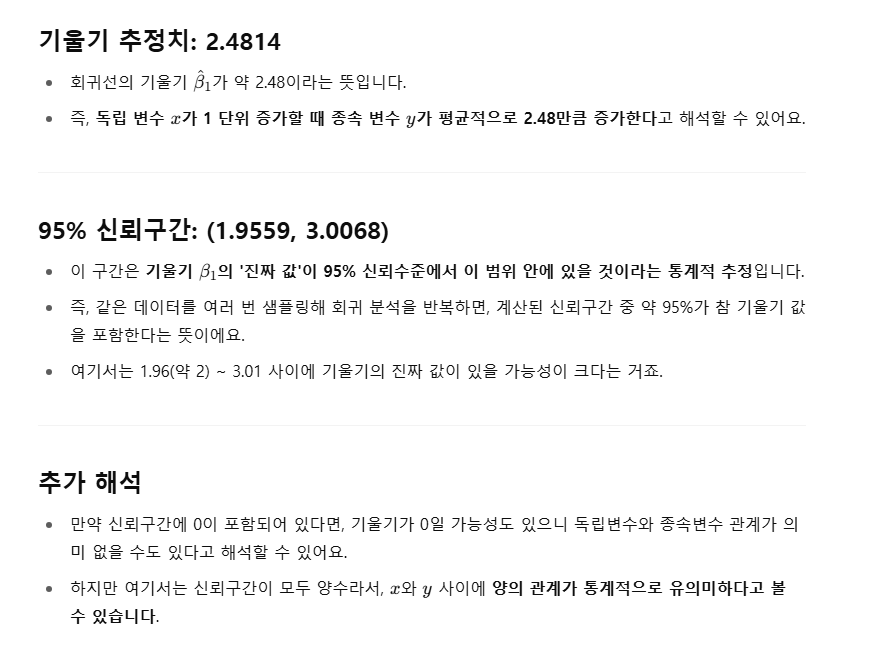